# Twitter Sentiment Analysis and Perdiction 

In [169]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import seaborn as sns 
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer

# plt.rcParams["figure.figsize"] = (20,10)
# plt.rcParams['figure.dpi'] = 300


In [380]:
df = pd.read_csv("btc_tweets.csv")
df = df.drop("Unnamed: 0",axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_name         99998 non-null   object 
 1   user_location     51490 non-null   object 
 2   user_description  86812 non-null   object 
 3   user_created      100000 non-null  object 
 4   user_followers    100000 non-null  float64
 5   user_friends      100000 non-null  int64  
 6   user_favourites   100000 non-null  int64  
 7   user_verified     100000 non-null  bool   
 8   date              100000 non-null  object 
 9   text              100000 non-null  object 
 10  hashtags          99985 non-null   object 
 11  source            99985 non-null   object 
 12  is_retweet        99985 non-null   object 
 13  label             100000 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(10)
memory usage: 10.0+ MB


<AxesSubplot:title={'center':'Missing data'}>

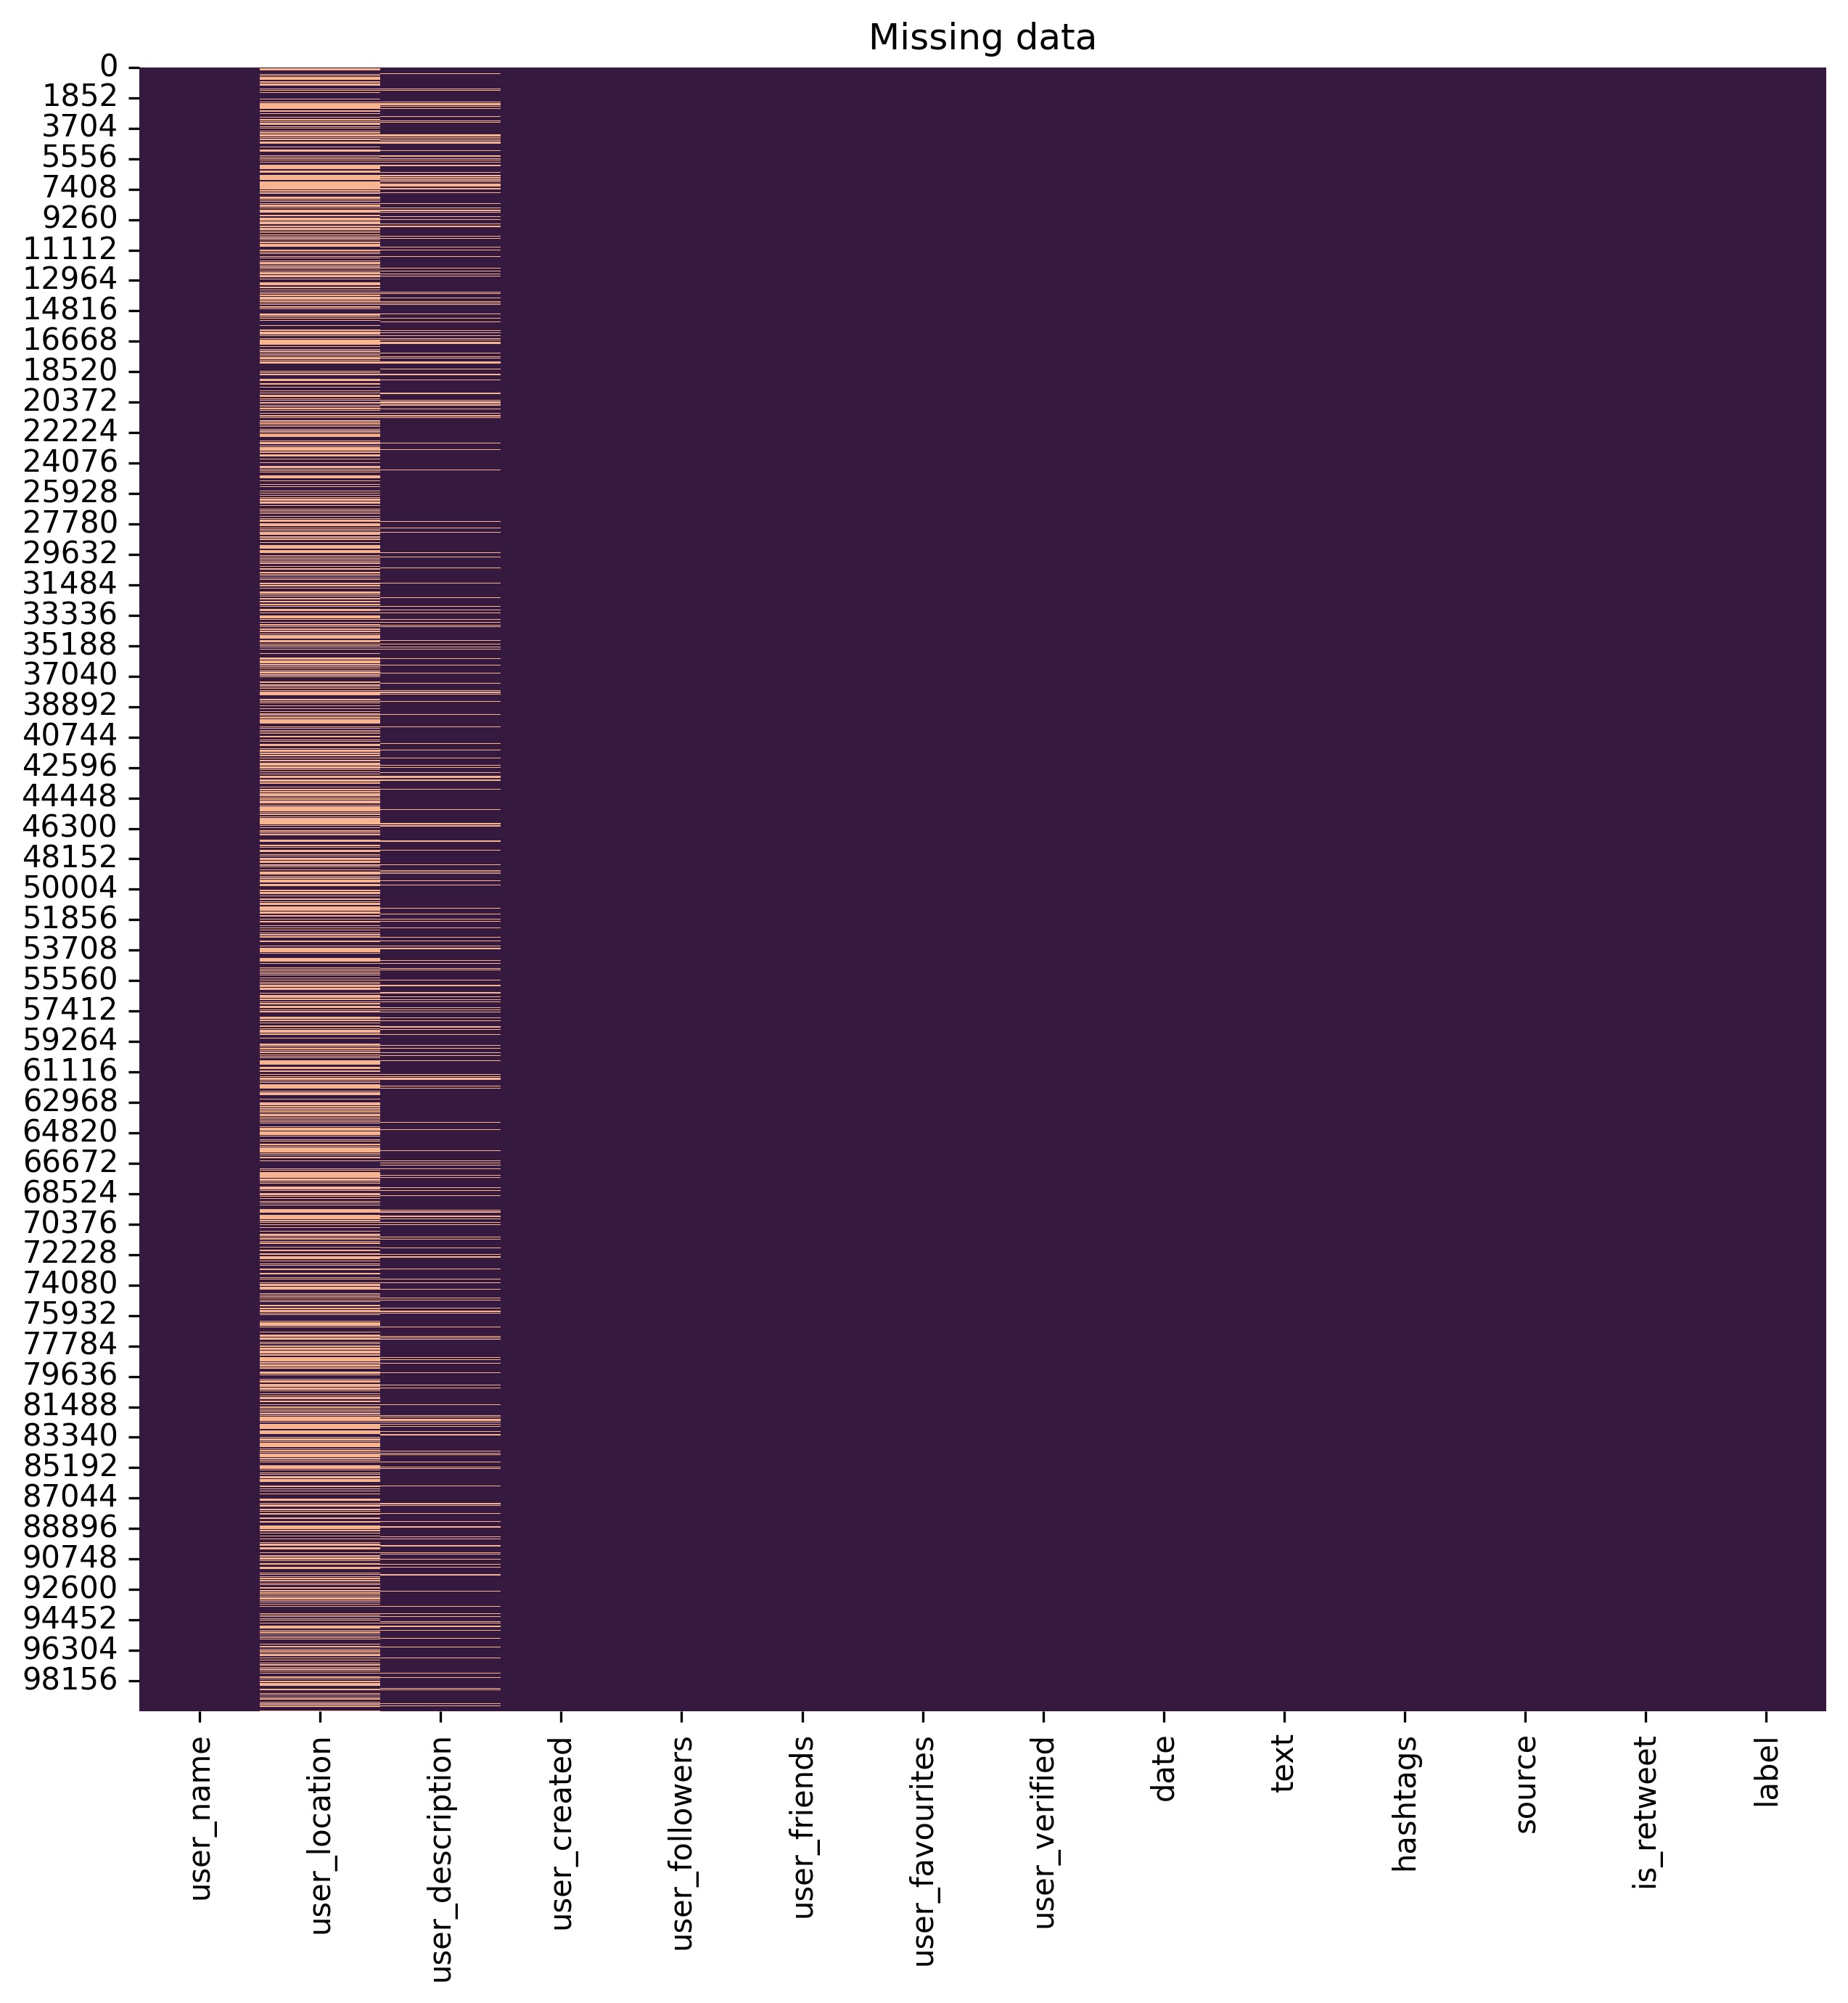

In [171]:
# viusalize if there is any missing data 

plt.figure(figsize=(10,10))
plt.title("Missing data")
a =sns.color_palette("rocket")
sns.heatmap(df.isnull(),cmap=a,cbar=False)



Text(0.5, 1.0, 'Setiment distribution')

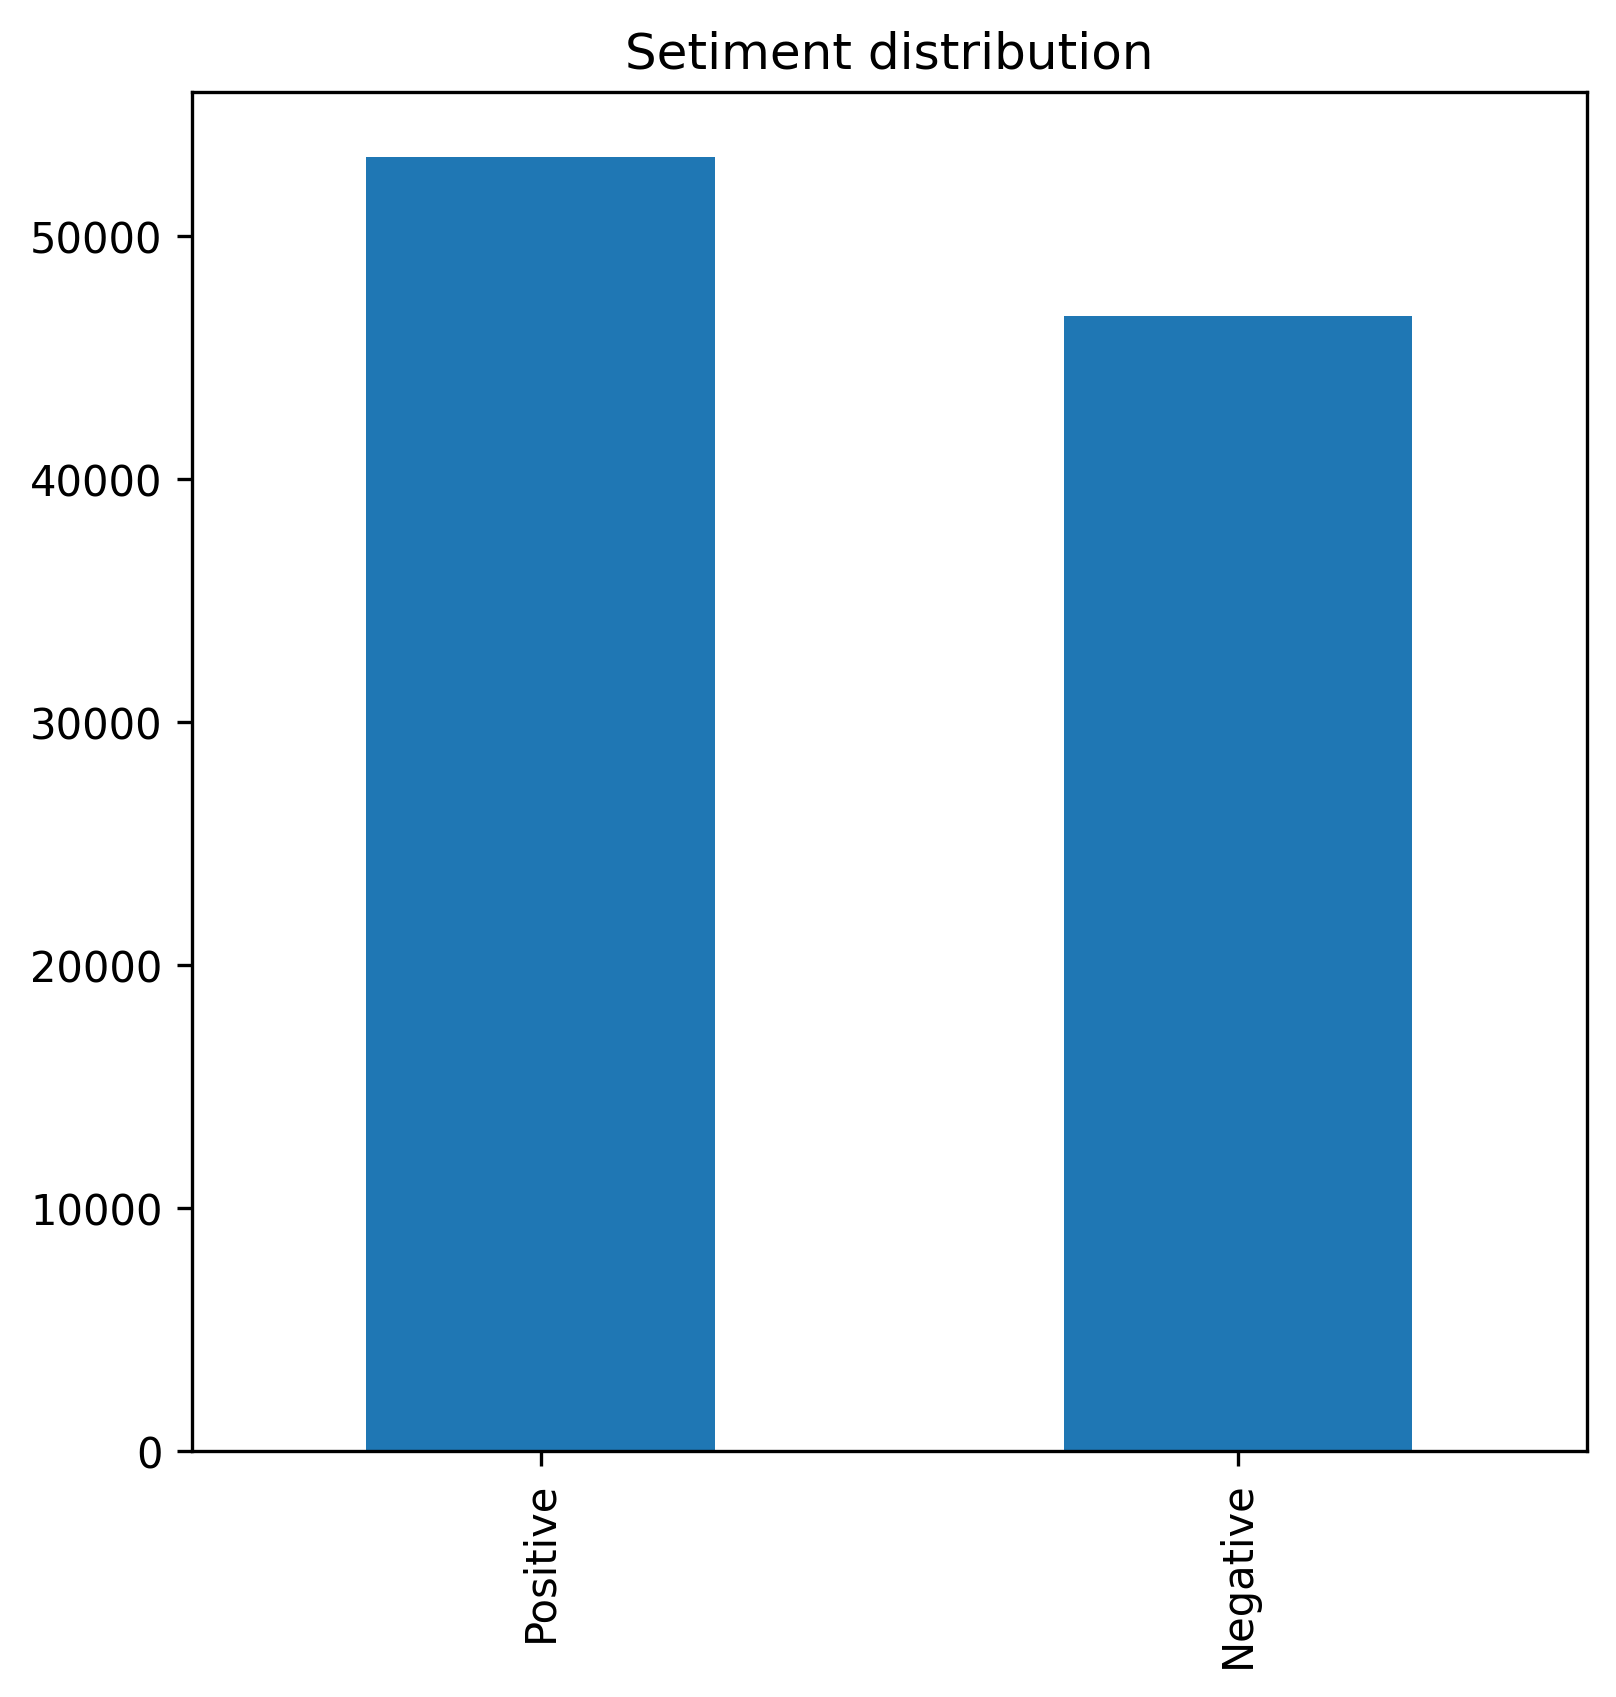

In [172]:
#look into the distribution of Sentiment to check if the sentiment is balance
plt.figure(figsize=(6,6))
df["label"].value_counts().plot(kind="bar")
plt.title("Setiment distribution")


# Standardization of the words of tweets

In [173]:
stop_words = stopwords.words('english')

def TextClean(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'@[a-z0-9_]\S+', '', tweet)
    tweet = re.sub(r'#[a-z0-9_]\S+', '', tweet)
    tweet = re.sub(r'&[a-z0-9_]\S+', '', tweet)
    tweet = re.sub(r'[?!.+,;$%&"]+', '', tweet)
    tweet = re.sub(r'rt[\s]+', '', tweet)
    tweet = re.sub(r'\d+', '', tweet)
    tweet = re.sub(r'\$', '', tweet)
    tweet = re.sub(r'rt+', '', tweet)
    tweet = re.sub(r'https?:?\/\/\S+', '', tweet)
    for word in stop_words:
        if word in tweet:
            tweet.replace(word, "")
            
    return tweet


df["clean_text"] = df["text"].apply(TextClean)
df_clean = df[["text","clean_text","label"]]
df_clean.sample(10)

text  \
46335  https://t.co/3EdJ3rTKFr \n\nIt's a RICH. MAN'S...   
49874  More dip coming hodl tight we may see btc to 3...   
97857  @TheRealSefmoney I can't see a big drop, nor a...   
45500  Nations to adopt Bitcoin, crypto users to reac...   
98553  Bitcoin price- Why is the cryptocurrency down ...   
26034  #doge coin is better than other Currencies whe...   
31598  This bothers you? Then don’t look at your p/l ...   
65110  @hernanlafalce If you don’t choice your own in...   
55238  Will punch the first one who dares to  tweet "...   
23456  #BTC Derivs Sheet (Tweet every 15 min.)\nCME D...   

                                              clean_text     label  
46335   \n\nit's a rich man's coin  classic pump and ...  Positive  
49874  more dip coming hodl tight we may see btc to k...  Negative  
97857   i can't see a big drop nor a dip do you\nhave...  Positive  
45500  nations to adopt bitcoin crypto users to reach...  Positive  
98553  bitcoin price- why is the cryptocurrency down ...  Negative  
26034   coin is better than other currencies when we ...  Positive  
31598  this bothers you then don’t look at your p/l u...  Negative  
65110   if you don’t choice your own investment plan ...  Positive  
55238  will punch the first one who dares to  tweet d...  Positive  
23456   derivs sheet (tweet every  min)\ncme delayed ...  Positive

# Tokenization of words

In [174]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

df_clean["tokens"] = df_clean["clean_text"].apply(tokenizer.tokenize)
df_clean[["clean_text","tokens"]].sample(10)

/var/folders/ls/60y566yx4pj9lx0v6hpkq9ph0000gn/T/ipykernel_7374/1051085590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["tokens"] = df_clean["clean_text"].apply(tokenizer.tokenize)


clean_text  \
80316             \ns \nfalling again\n\nwait for \n\n\n   
212    finally i can focus on the  market tired of   ...   
92251     only reason stx is down is because btc is d...   
17164  the project has a good development and long te...   
21720  what will the metaverse look like in the futur...   
78121  ozzy osbourne's nft project cryptobatz followe...   
67335  see you at k   then boom the chase for a new a...   
89886   nothings permanent in the last year  he got h...   
87973   dip \n\ngo ahead make my day stack sats and h...   
68284                           super\n\n\n\n\n            

                                                  tokens  
80316                     [s, falling, again, wait, for]  
212    [finally, i, can, focus, on, the, market, tire...  
92251  [only, reason, stx, is, down, is, because, btc...  
17164  [the, project, has, a, good, development, and,...  
21720  [what, will, the, metaverse, look, like, in, t...  
78121  [ozzy, osbourne, s, nft, project, cryptobatz, ...  
67335  [see, you, at, k, then, boom, the, chase, for,...  
89886  [nothings, permanent, in, the, last, year, he,...  
87973  [dip, go, ahead, make, my, day, stack, sats, a...  
68284                                            [super]

In [175]:
all_words = [word for tokens in df_clean["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in df_clean["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

1832807 words total, with a vocabulary size of 33775
Max sentence length is 65


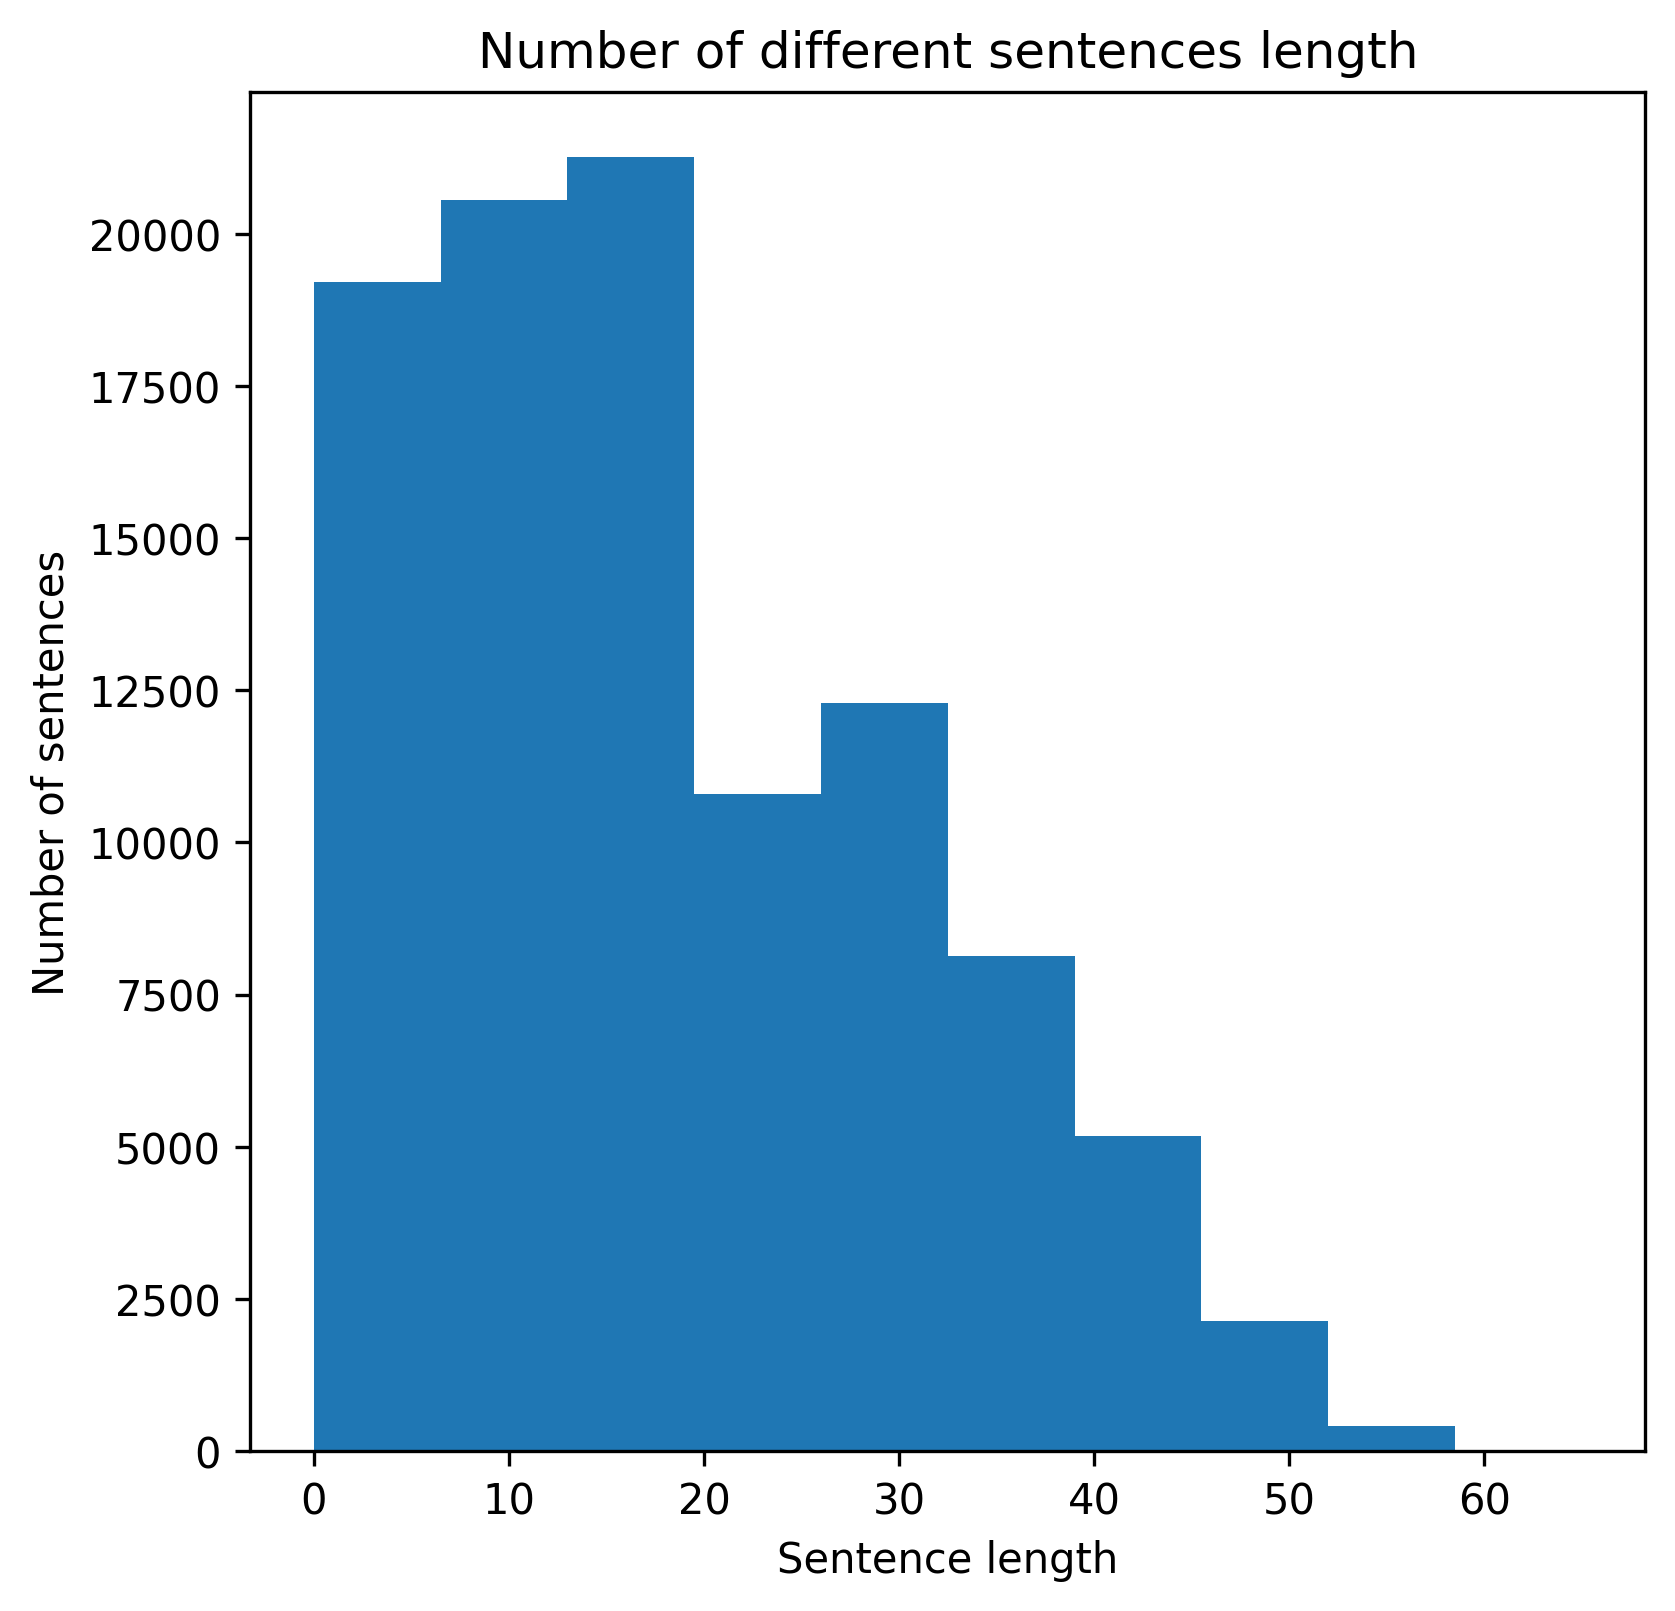

In [259]:
fig = plt.figure(figsize=(6, 6)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.title('Number of different sentences length')
plt.hist(sentence_lengths)
plt.savefig('test.png')
plt.show()

# Vectorization of words for Machine Learning

In [310]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Bag of Words Apporach,which is a dictionary recording the number of appearance of a token in a document.
def count_vectorize(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

# Tfidf Appoarch,  which is a transformation for bag-of-words documents.
# It tries to alter the values in the BOW documents with the information across the corpus (the collection of documents).
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer


list_corpus = df_clean["clean_text"].tolist()
list_labels = df_clean["label"].tolist()

# Before trainning the data, it is need to split the data into trainning part and test part
X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2)

X_train_counts, count_vectorizer = count_vectorize(X_train)
X_test_counts = count_vectorizer.transform(X_test)

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

y_test = pd.Series(y_test)

Text(0.5, 1.0, 'Viusal of tfidf sample after SVD')

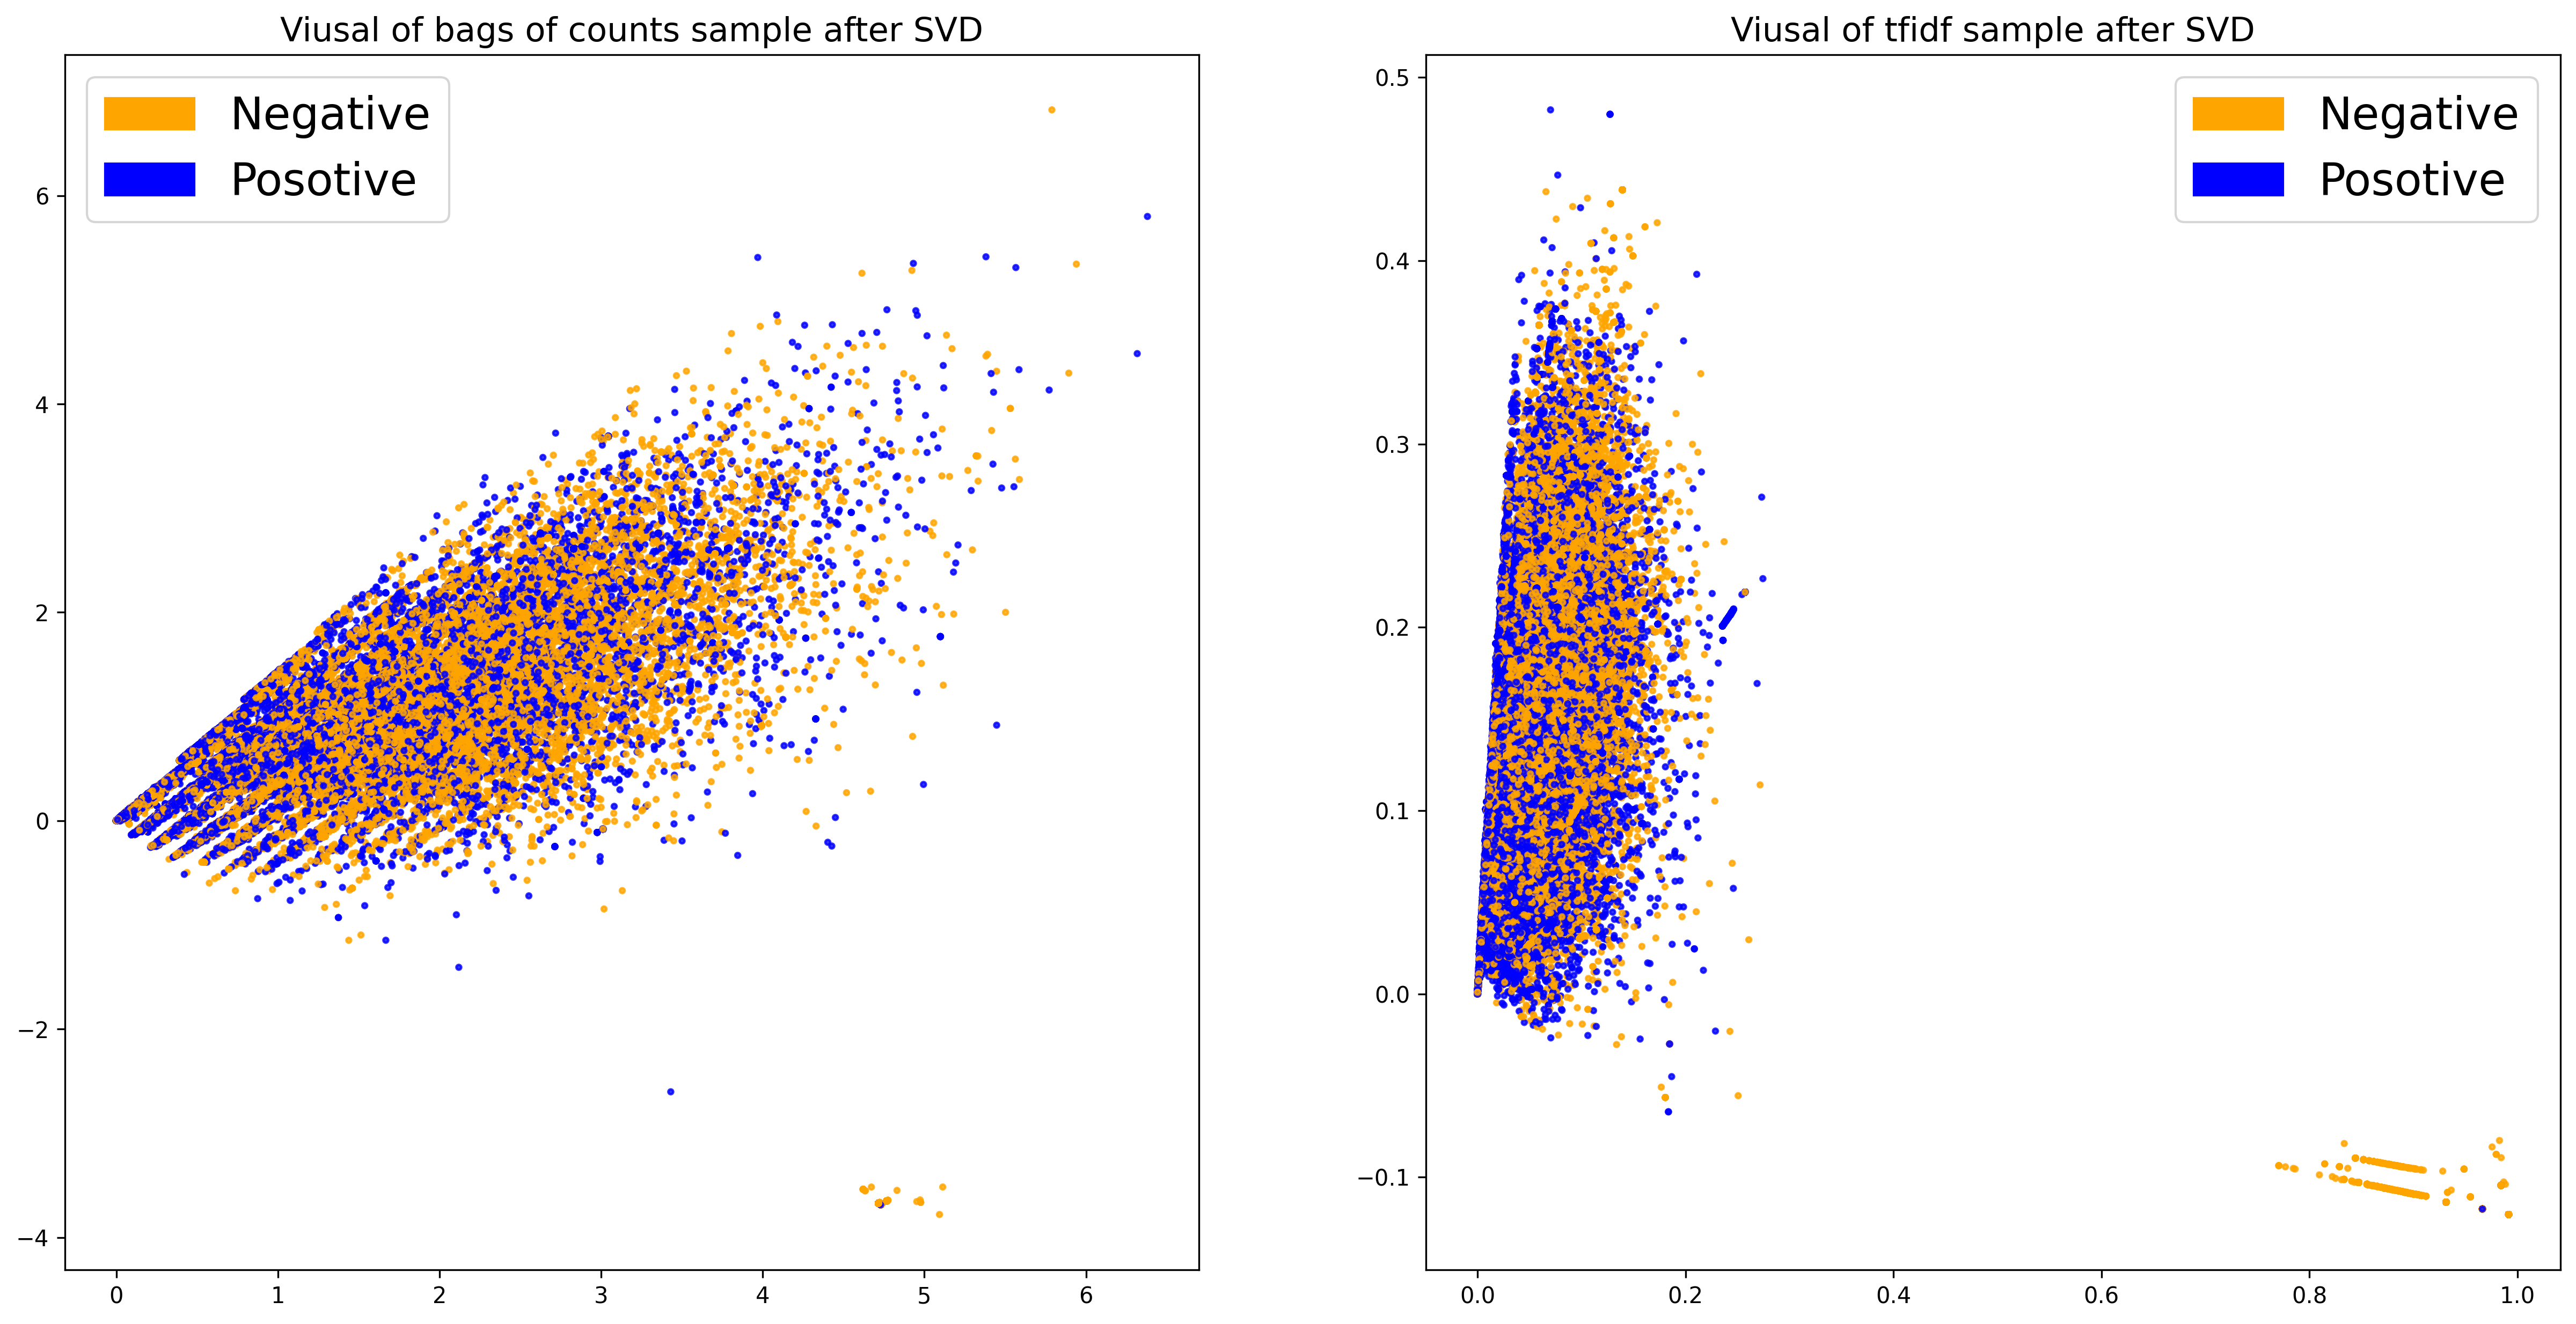

In [311]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches

# Dimension reduction for bags of counts sample
lsa_count = TruncatedSVD(n_components=2)
lsa_count .fit(X_train_counts)
lsa_count_scores = lsa_count .transform(X_train_counts)

# Dimension reduction for bags of counts sample
lsa_tfidf = TruncatedSVD(n_components=2)
lsa_tfidf.fit(X_train_tfidf)
lsa_tfidf_scores = lsa_tfidf.transform(X_train_tfidf)

color_mapper = {label:idx for idx,label in enumerate(set(y_train))}
color_column = [color_mapper[label] for label in y_train]
colors = ['orange','blue']
color_train = []
for item in color_column:
    color_train.append(colors[item])

# color for label 
orange_patch = mpatches.Patch(color='orange', label='Negative')
blue_patch = mpatches.Patch(color='blue', label='Posotive')

# plot for bags of counts sample
figure, (ax1, ax2) = plt.subplots(1, 2) 
ax1.scatter(lsa_count_scores[:,0], lsa_count_scores[:,1], s=5,
                               alpha=.8, c=color_train, cmap=matplotlib.colors.ListedColormap(colors))
ax1.legend(handles=[orange_patch,blue_patch], prop={'size': 20})
ax1.set_title("Viusal of bags of counts sample after SVD",fontdict={"fontsize" : 15})

# plot for bags of counts sample
ax2.scatter(lsa_tfidf_scores[:,0], lsa_tfidf_scores[:,1], s=5, alpha=.8,
            c=color_train, cmap=matplotlib.colors.ListedColormap(colors))
ax2.legend(handles=[orange_patch,blue_patch], prop={'size': 20})
ax2.set_title("Viusal of tfidf sample after SVD",fontdict={"fontsize" : 15})


# Training the dataset with Random Forest Model 

In [312]:
from sklearn.ensemble import RandomForestClassifier
clf_rf             = RandomForestClassifier(random_state=0)

# bags of counts sample
clf_rf_count       = clf_rf.fit(X_train_counts, y_train)
y_predicted_counts = clf_rf.predict(X_test_counts)

# tfidf sample
clf_rf_tfidf       = clf_rf.fit(X_train_tfidf, y_train)
y_predicted_tfidf  = clf_rf.predict(X_test_tfidf)



In [313]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

cm_counts = confusion_matrix(y_test, y_predicted_counts)
cm_tfidf   = confusion_matrix(y_test, y_predicted_tfidf)



In [314]:
#classification_report of trained counts dataset
print(classification_report(y_test,y_predicted_counts))

              precision    recall  f1-score   support

    Negative       0.85      0.89      0.87      9422
    Positive       0.89      0.86      0.88     10578

    accuracy                           0.87     20000
   macro avg       0.87      0.87      0.87     20000
weighted avg       0.87      0.87      0.87     20000



In [315]:
#classification_report of trained counts dataset
print(classification_report(y_test,y_predicted_tfidf))

              precision    recall  f1-score   support

    Negative       0.84      0.89      0.87      9422
    Positive       0.89      0.85      0.87     10578

    accuracy                           0.87     20000
   macro avg       0.87      0.87      0.87     20000
weighted avg       0.87      0.87      0.87     20000



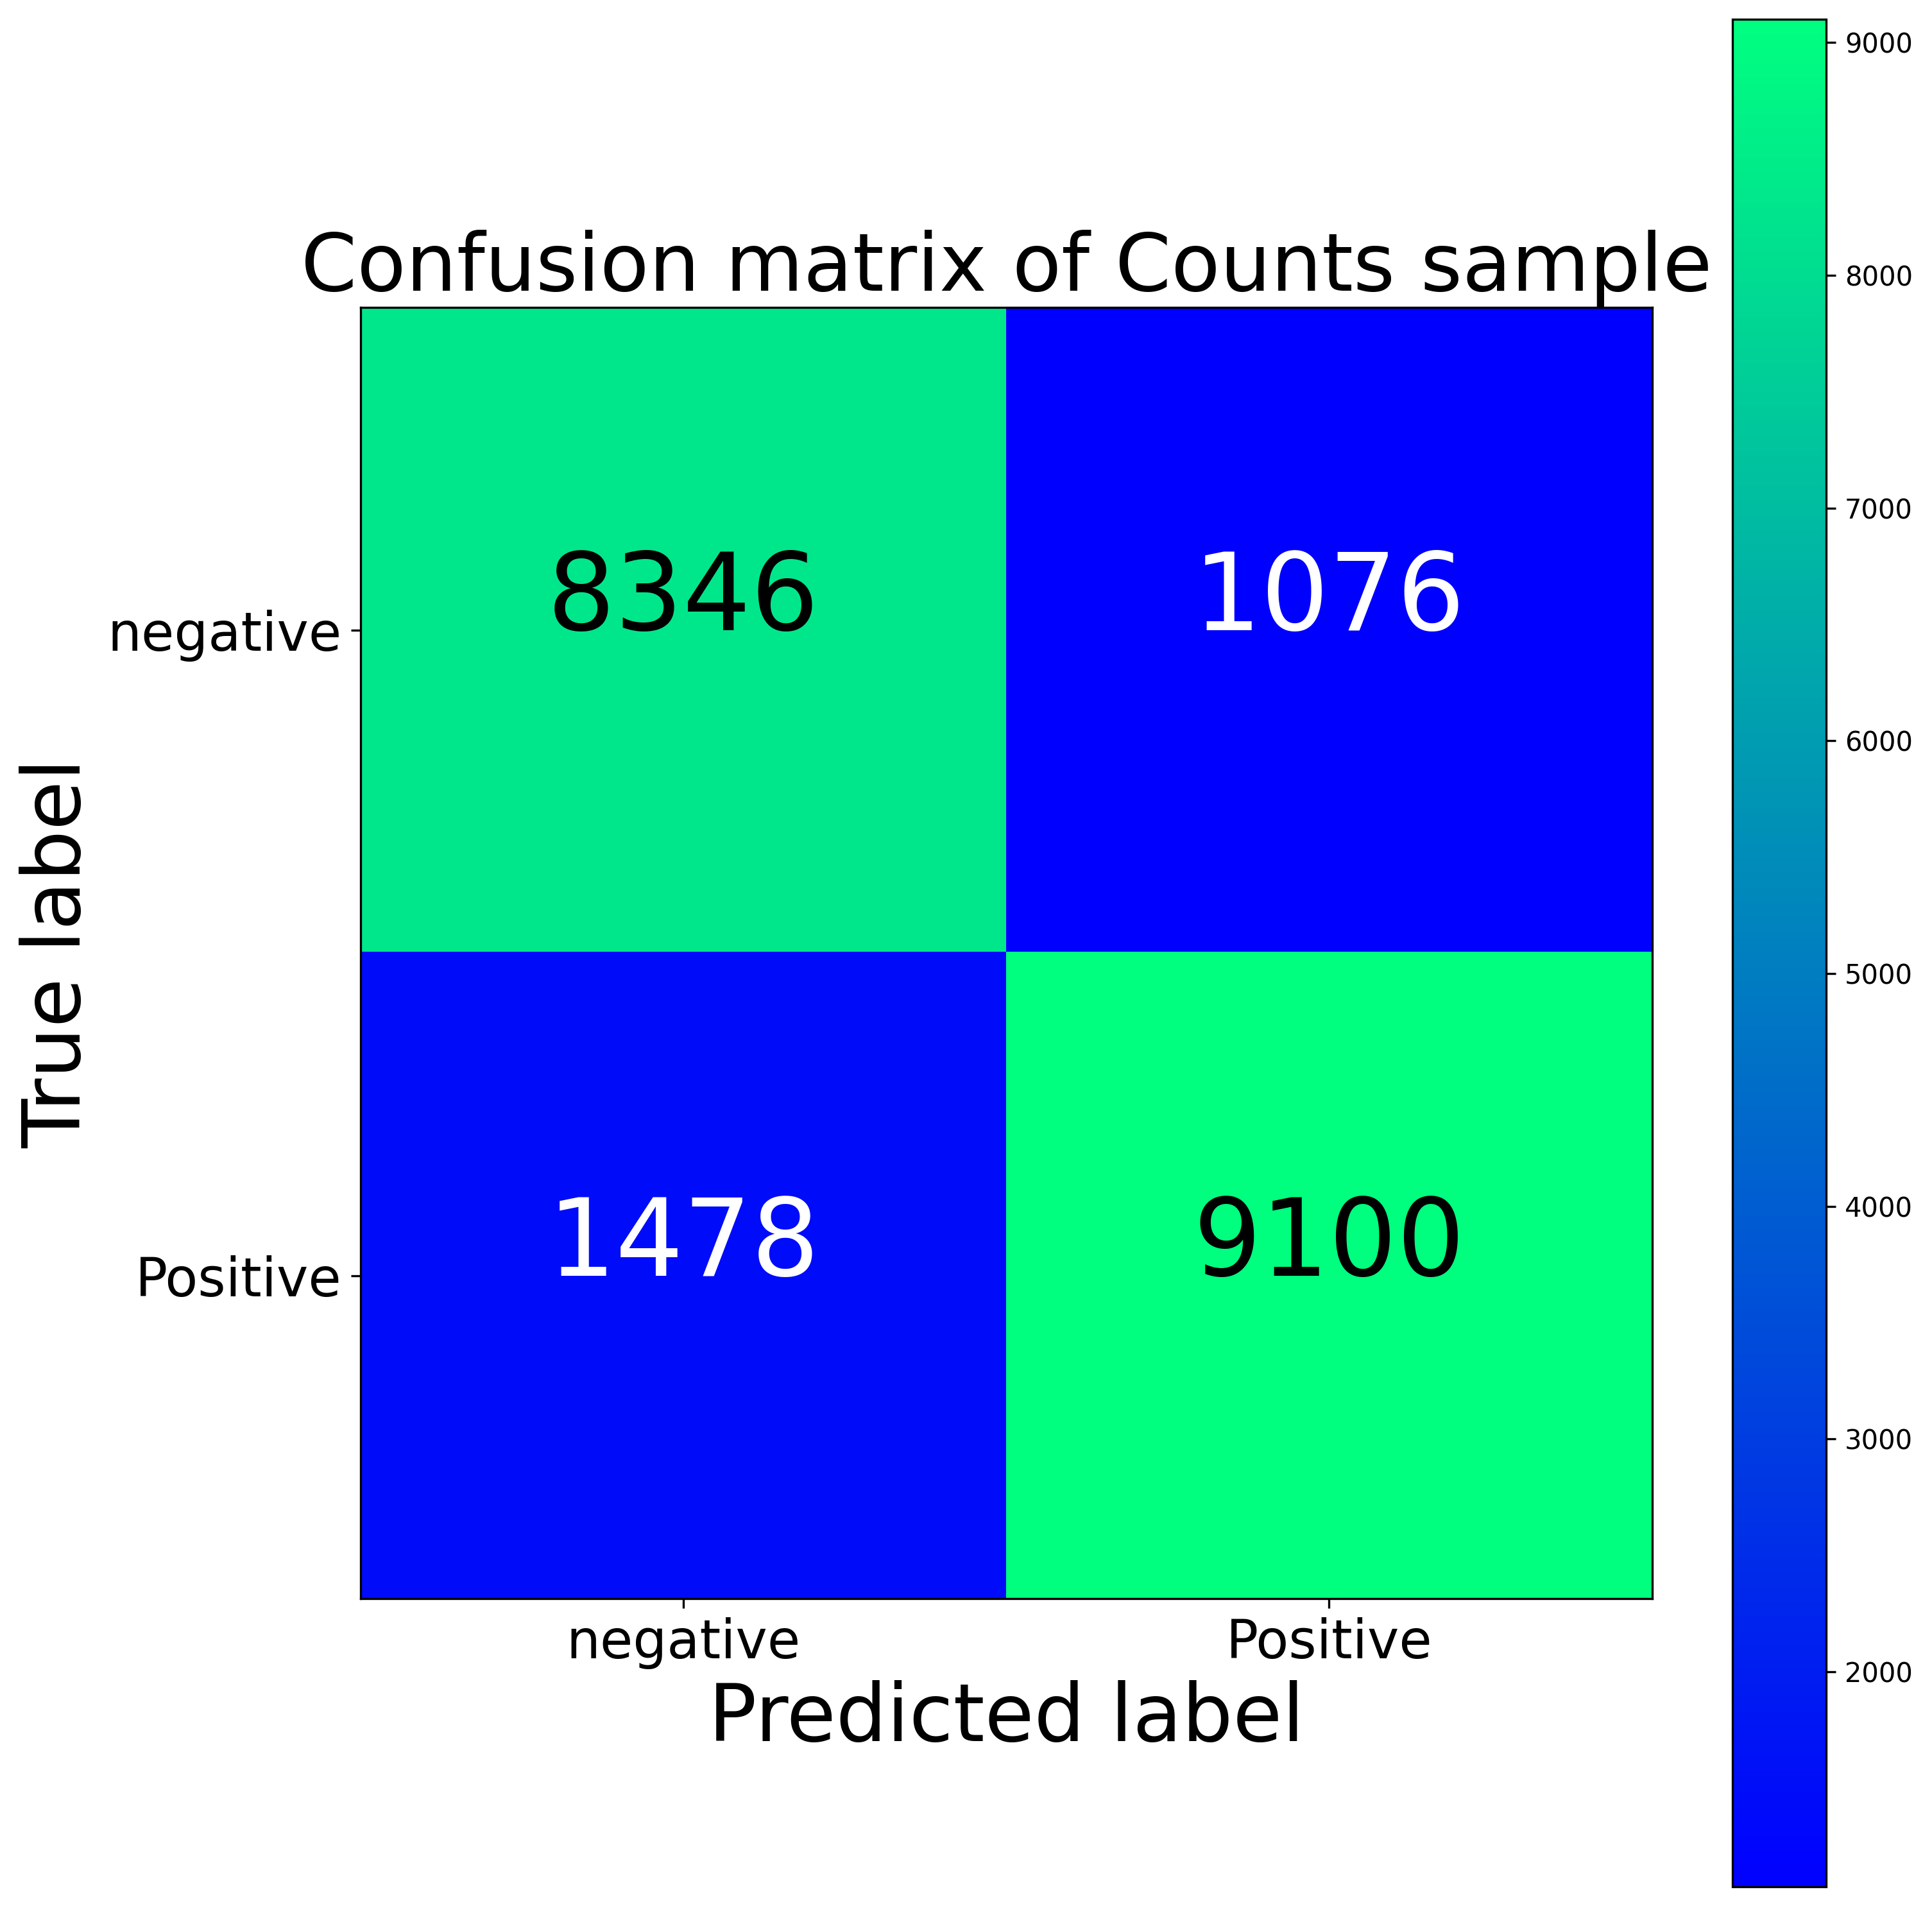

In [316]:
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm_counts, classes=['negative','Positive'], 
                                 normalize=False, title='Confusion matrix of Counts sample')


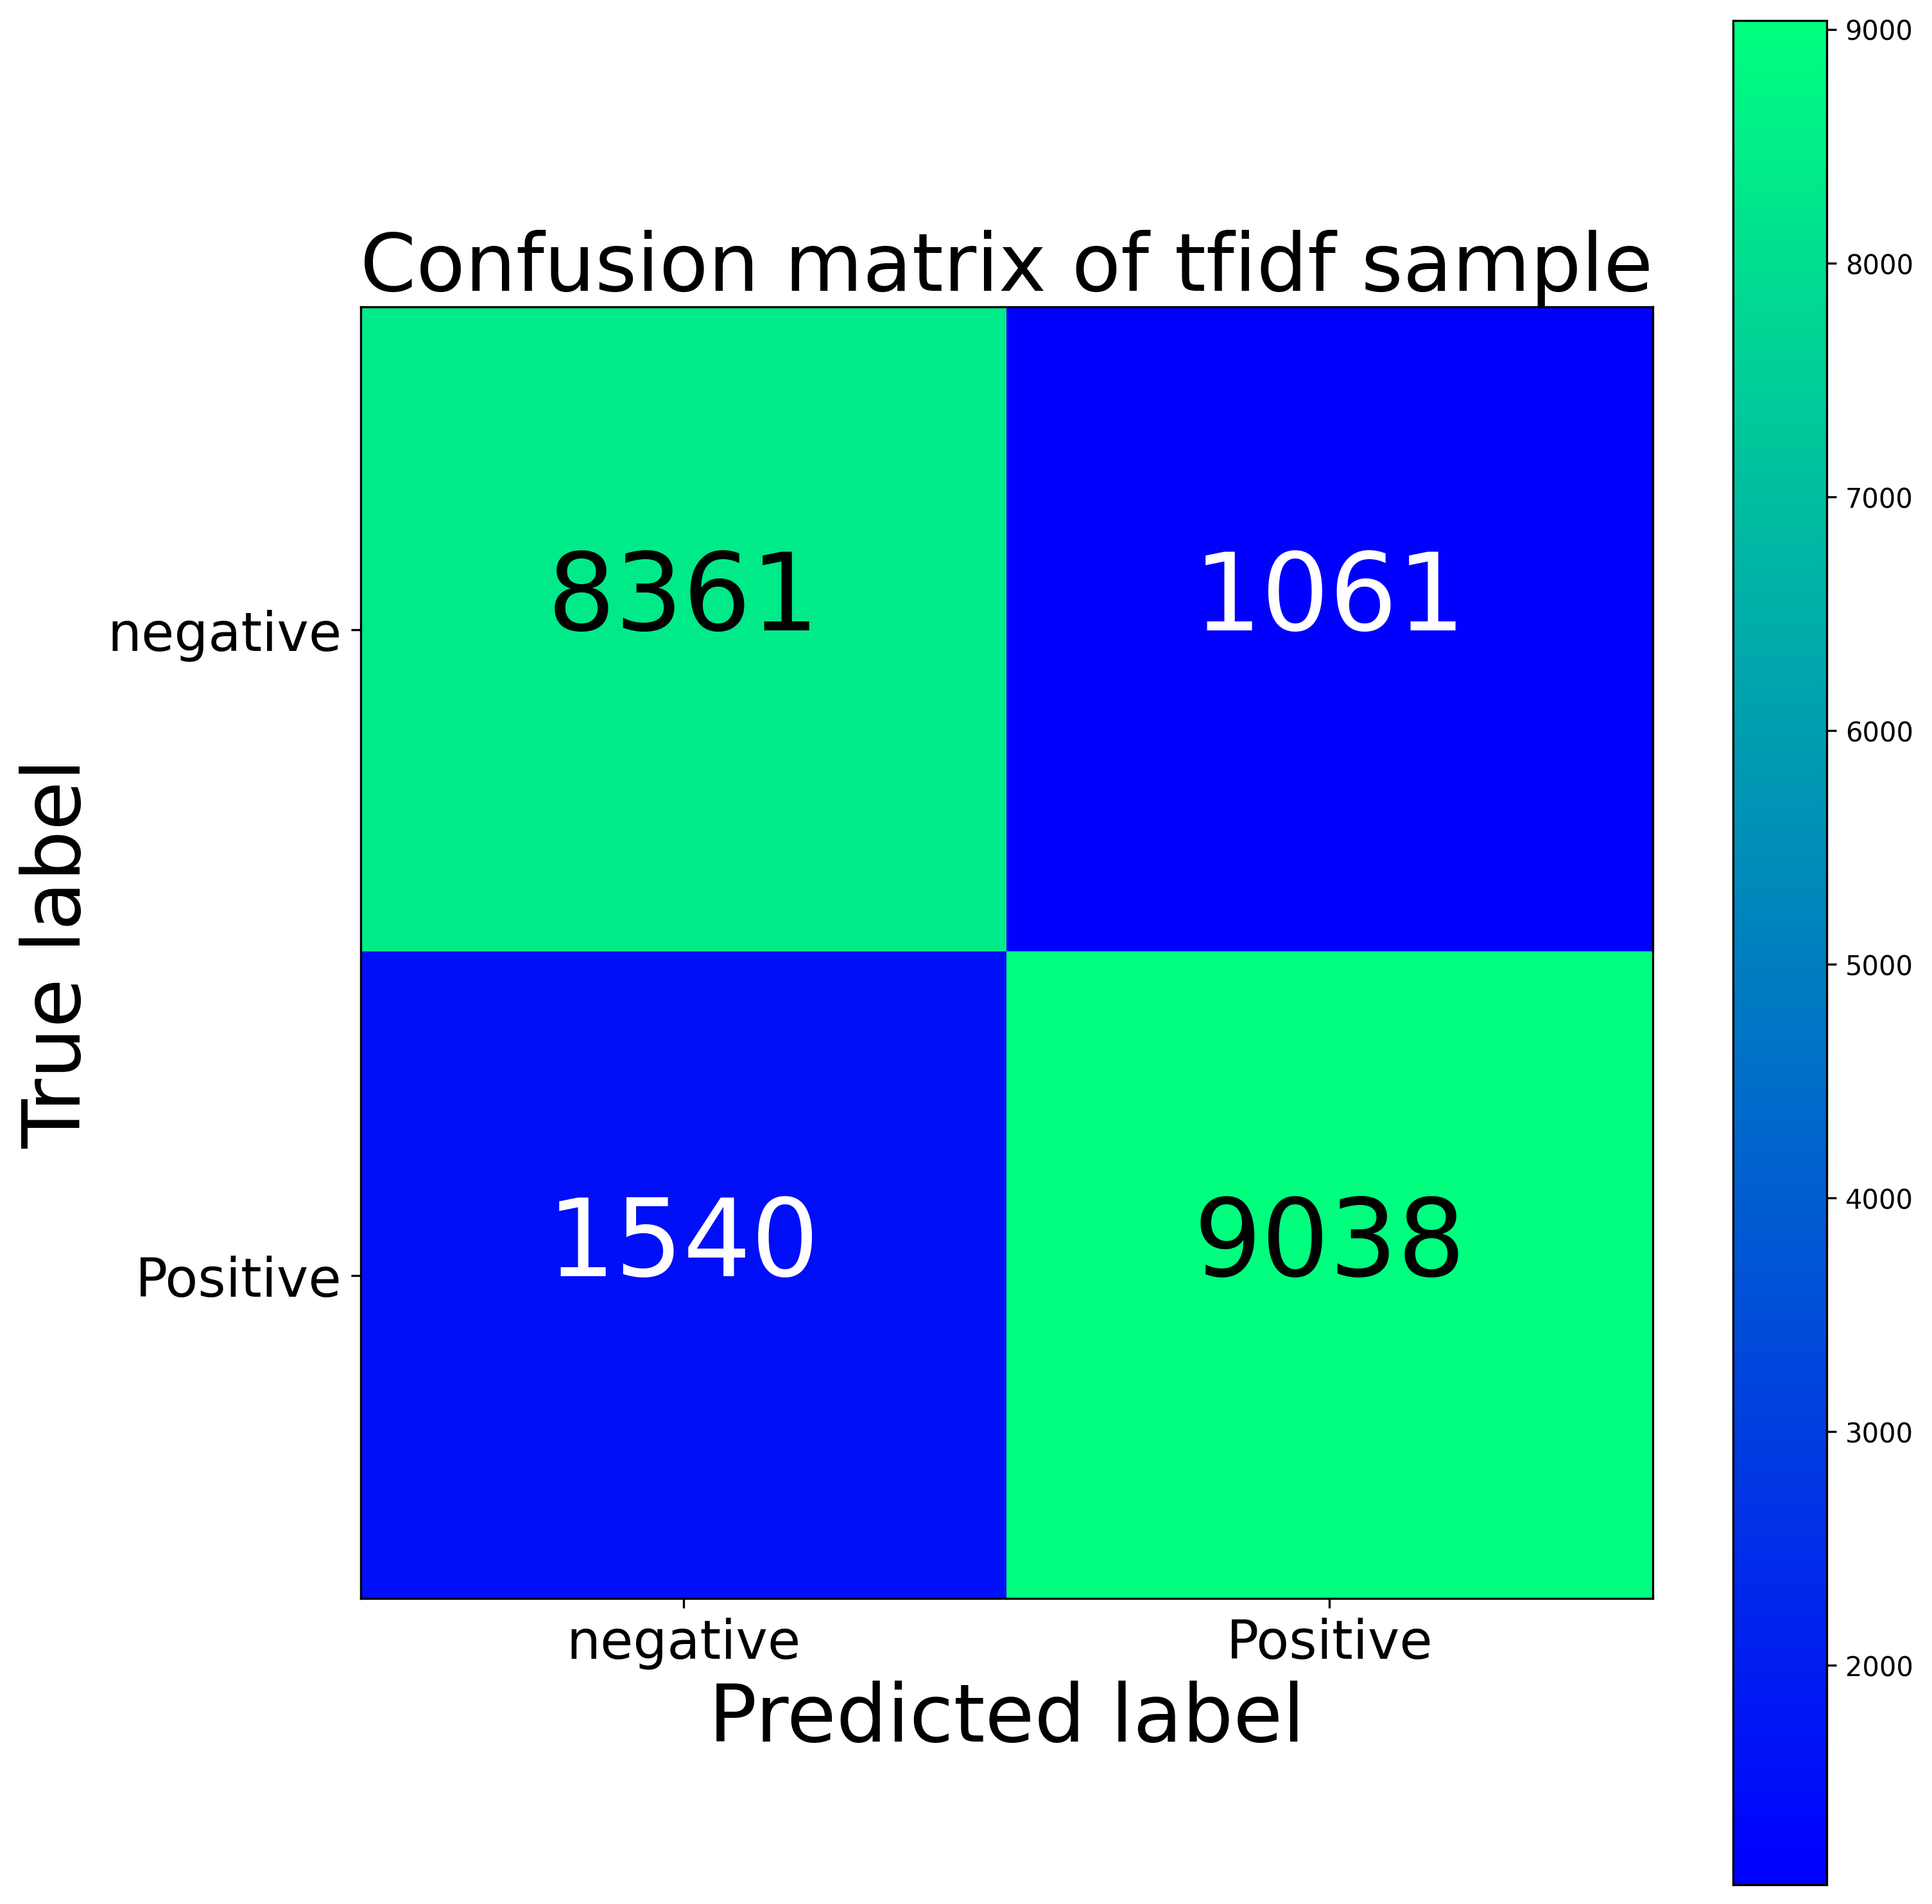

In [317]:
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm_tfidf, classes=['negative','Positive'], 
                                 normalize=False, title='Confusion matrix of tfidf sample')

# Training the dataset with Logistic Regression Model 

In [318]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                            n_jobs=-1, random_state=40)

# bags of counts sample
clf_lr_count          = clf_lr.fit(X_train_counts, y_train)
y_predicted_counts_lr = clf_lr_count.predict(X_test_counts)

# tfidf sample
clf_lr_tfidf          = clf_lr.fit(X_train_tfidf, y_train)
y_predicted_tfidf_lr  = clf_lr_tfidf.predict(X_test_tfidf)

cm_lr_counts  = confusion_matrix(y_test, y_predicted_counts_lr)
cm_lr_tfidf   = confusion_matrix(y_test, y_predicted_tfidf_lr)

In [319]:
#classification_report of trained counts dataset
print(classification_report(y_test,y_predicted_counts_lr))

              precision    recall  f1-score   support

    Negative       0.87      0.91      0.89      9422
    Positive       0.91      0.88      0.90     10578

    accuracy                           0.89     20000
   macro avg       0.89      0.89      0.89     20000
weighted avg       0.89      0.89      0.89     20000



In [320]:
#classification_report of trained counts dataset
print(classification_report(y_test,y_predicted_tfidf_lr))

              precision    recall  f1-score   support

    Negative       0.87      0.91      0.89      9422
    Positive       0.92      0.88      0.90     10578

    accuracy                           0.90     20000
   macro avg       0.89      0.90      0.89     20000
weighted avg       0.90      0.90      0.90     20000



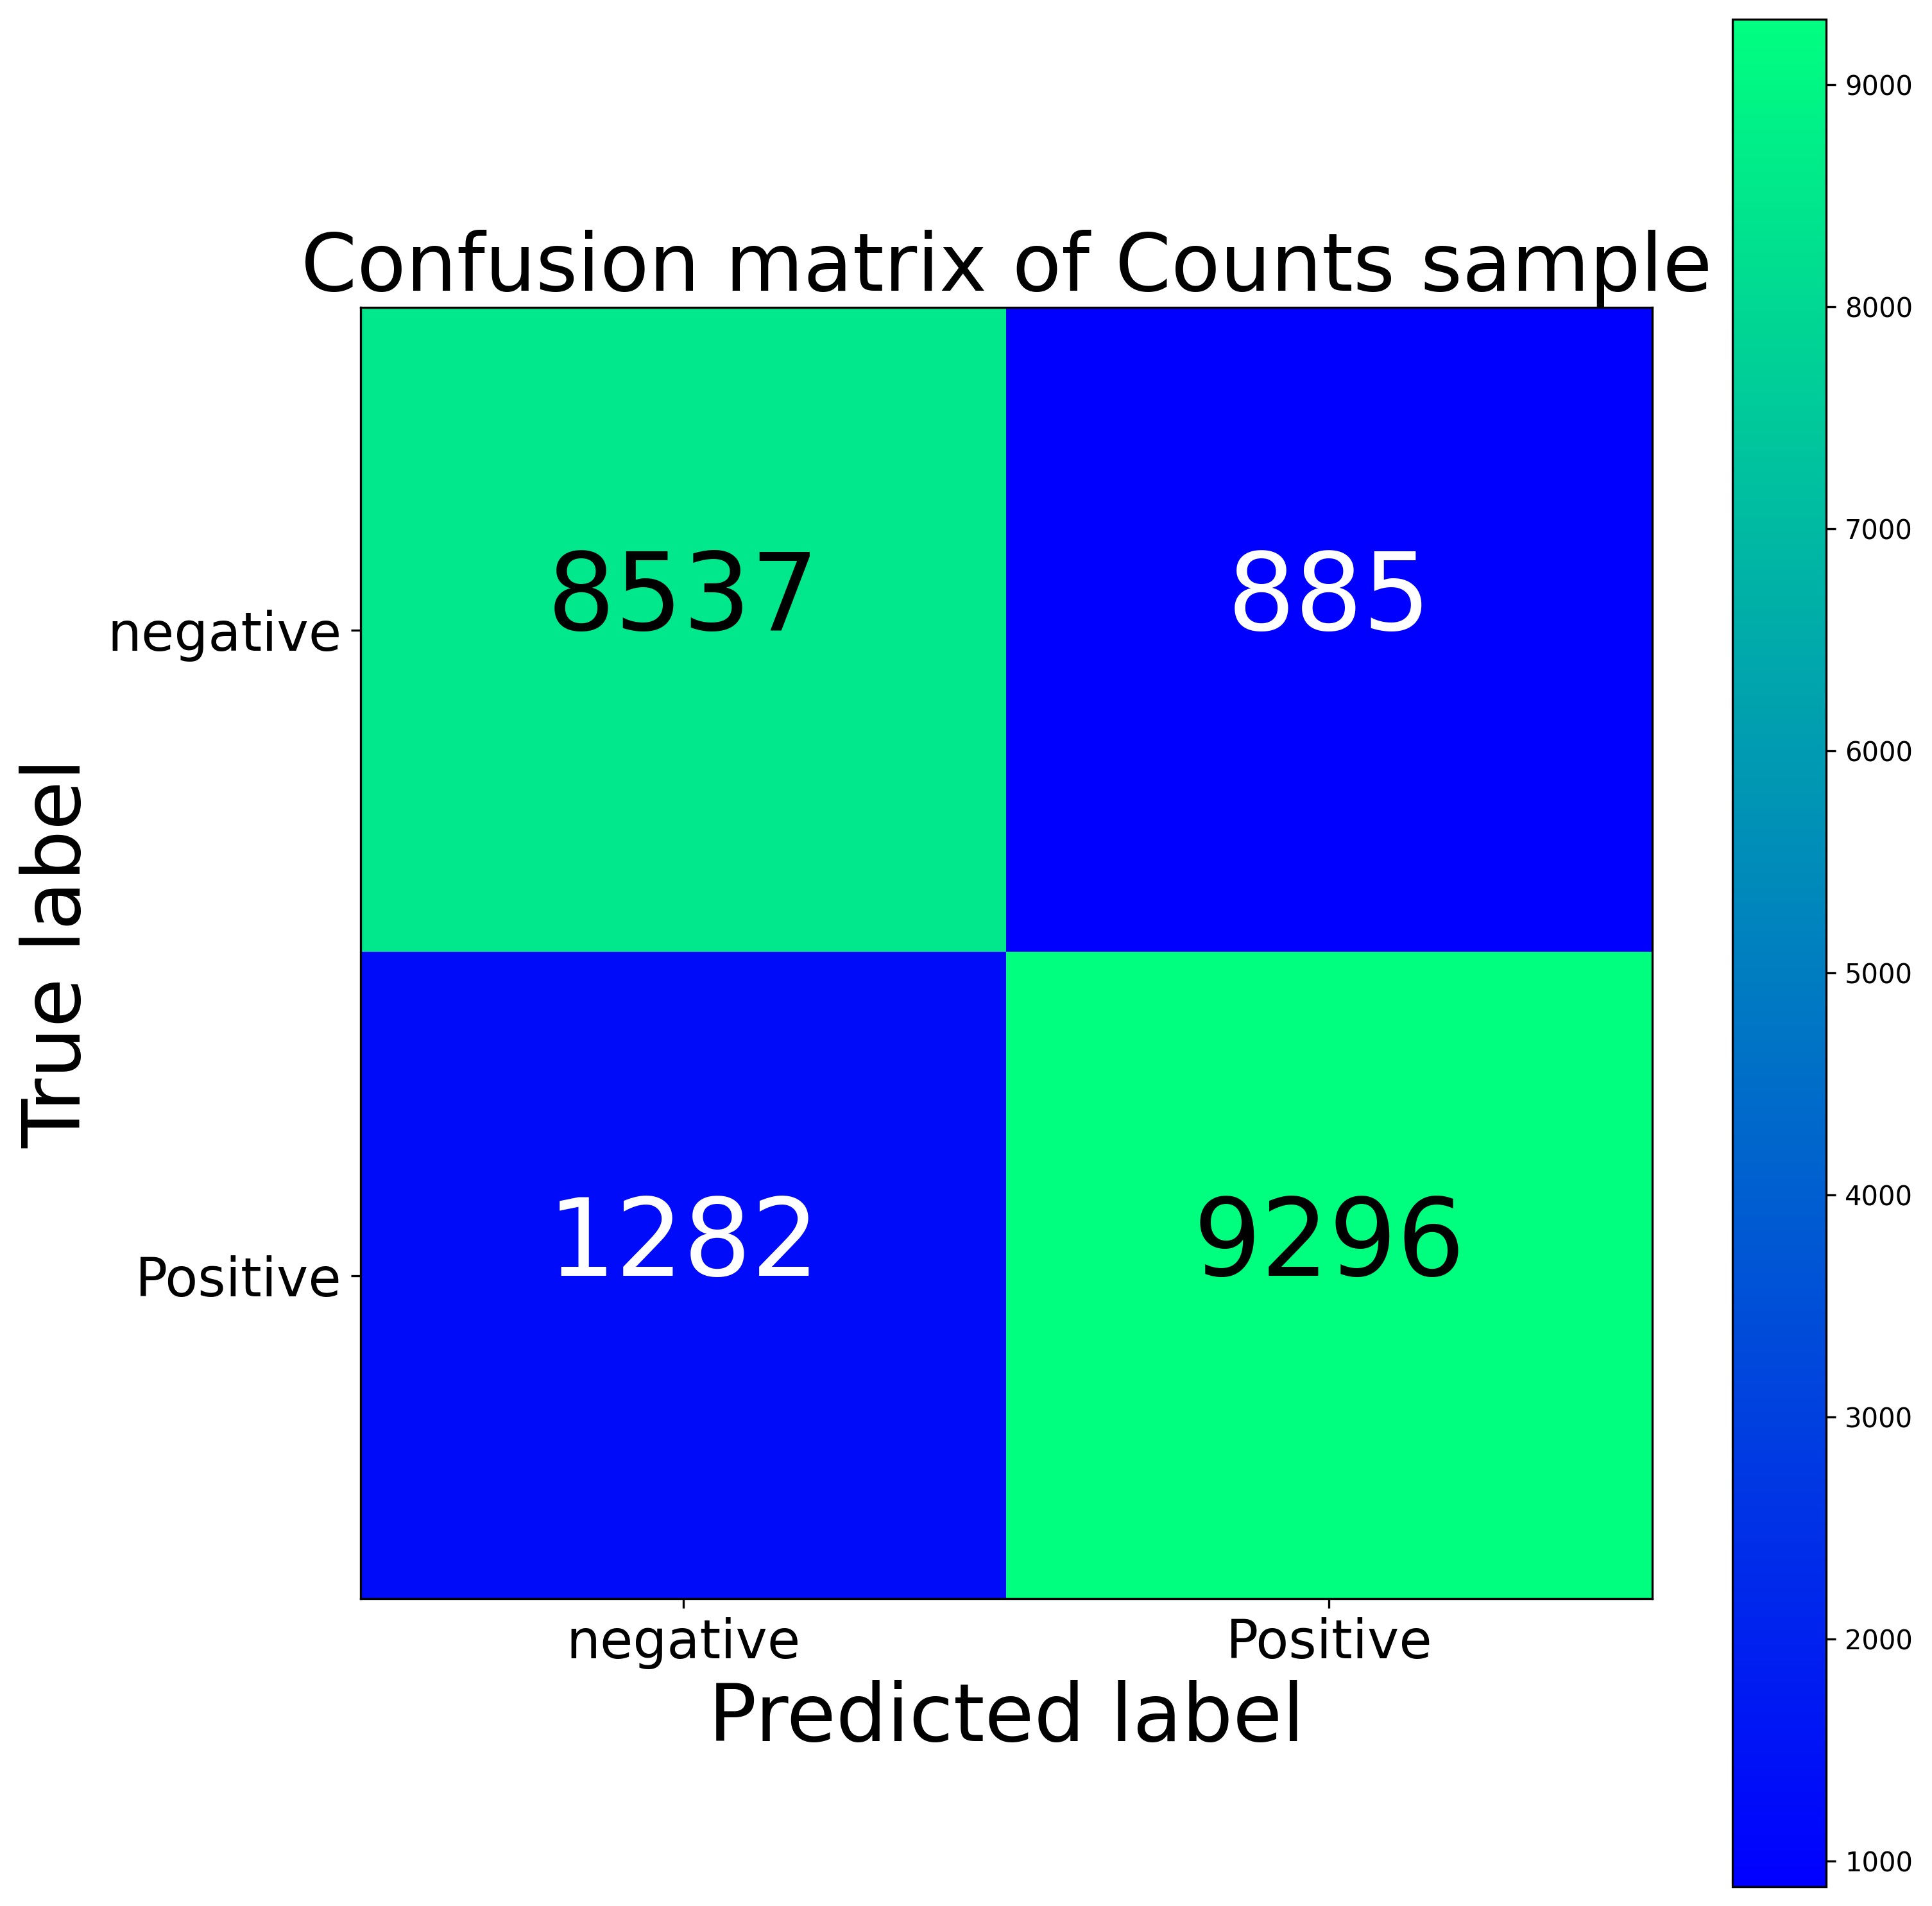

In [321]:
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm_lr_counts, classes=['negative','Positive'], 
                                 normalize=False, title='Confusion matrix of Counts sample')


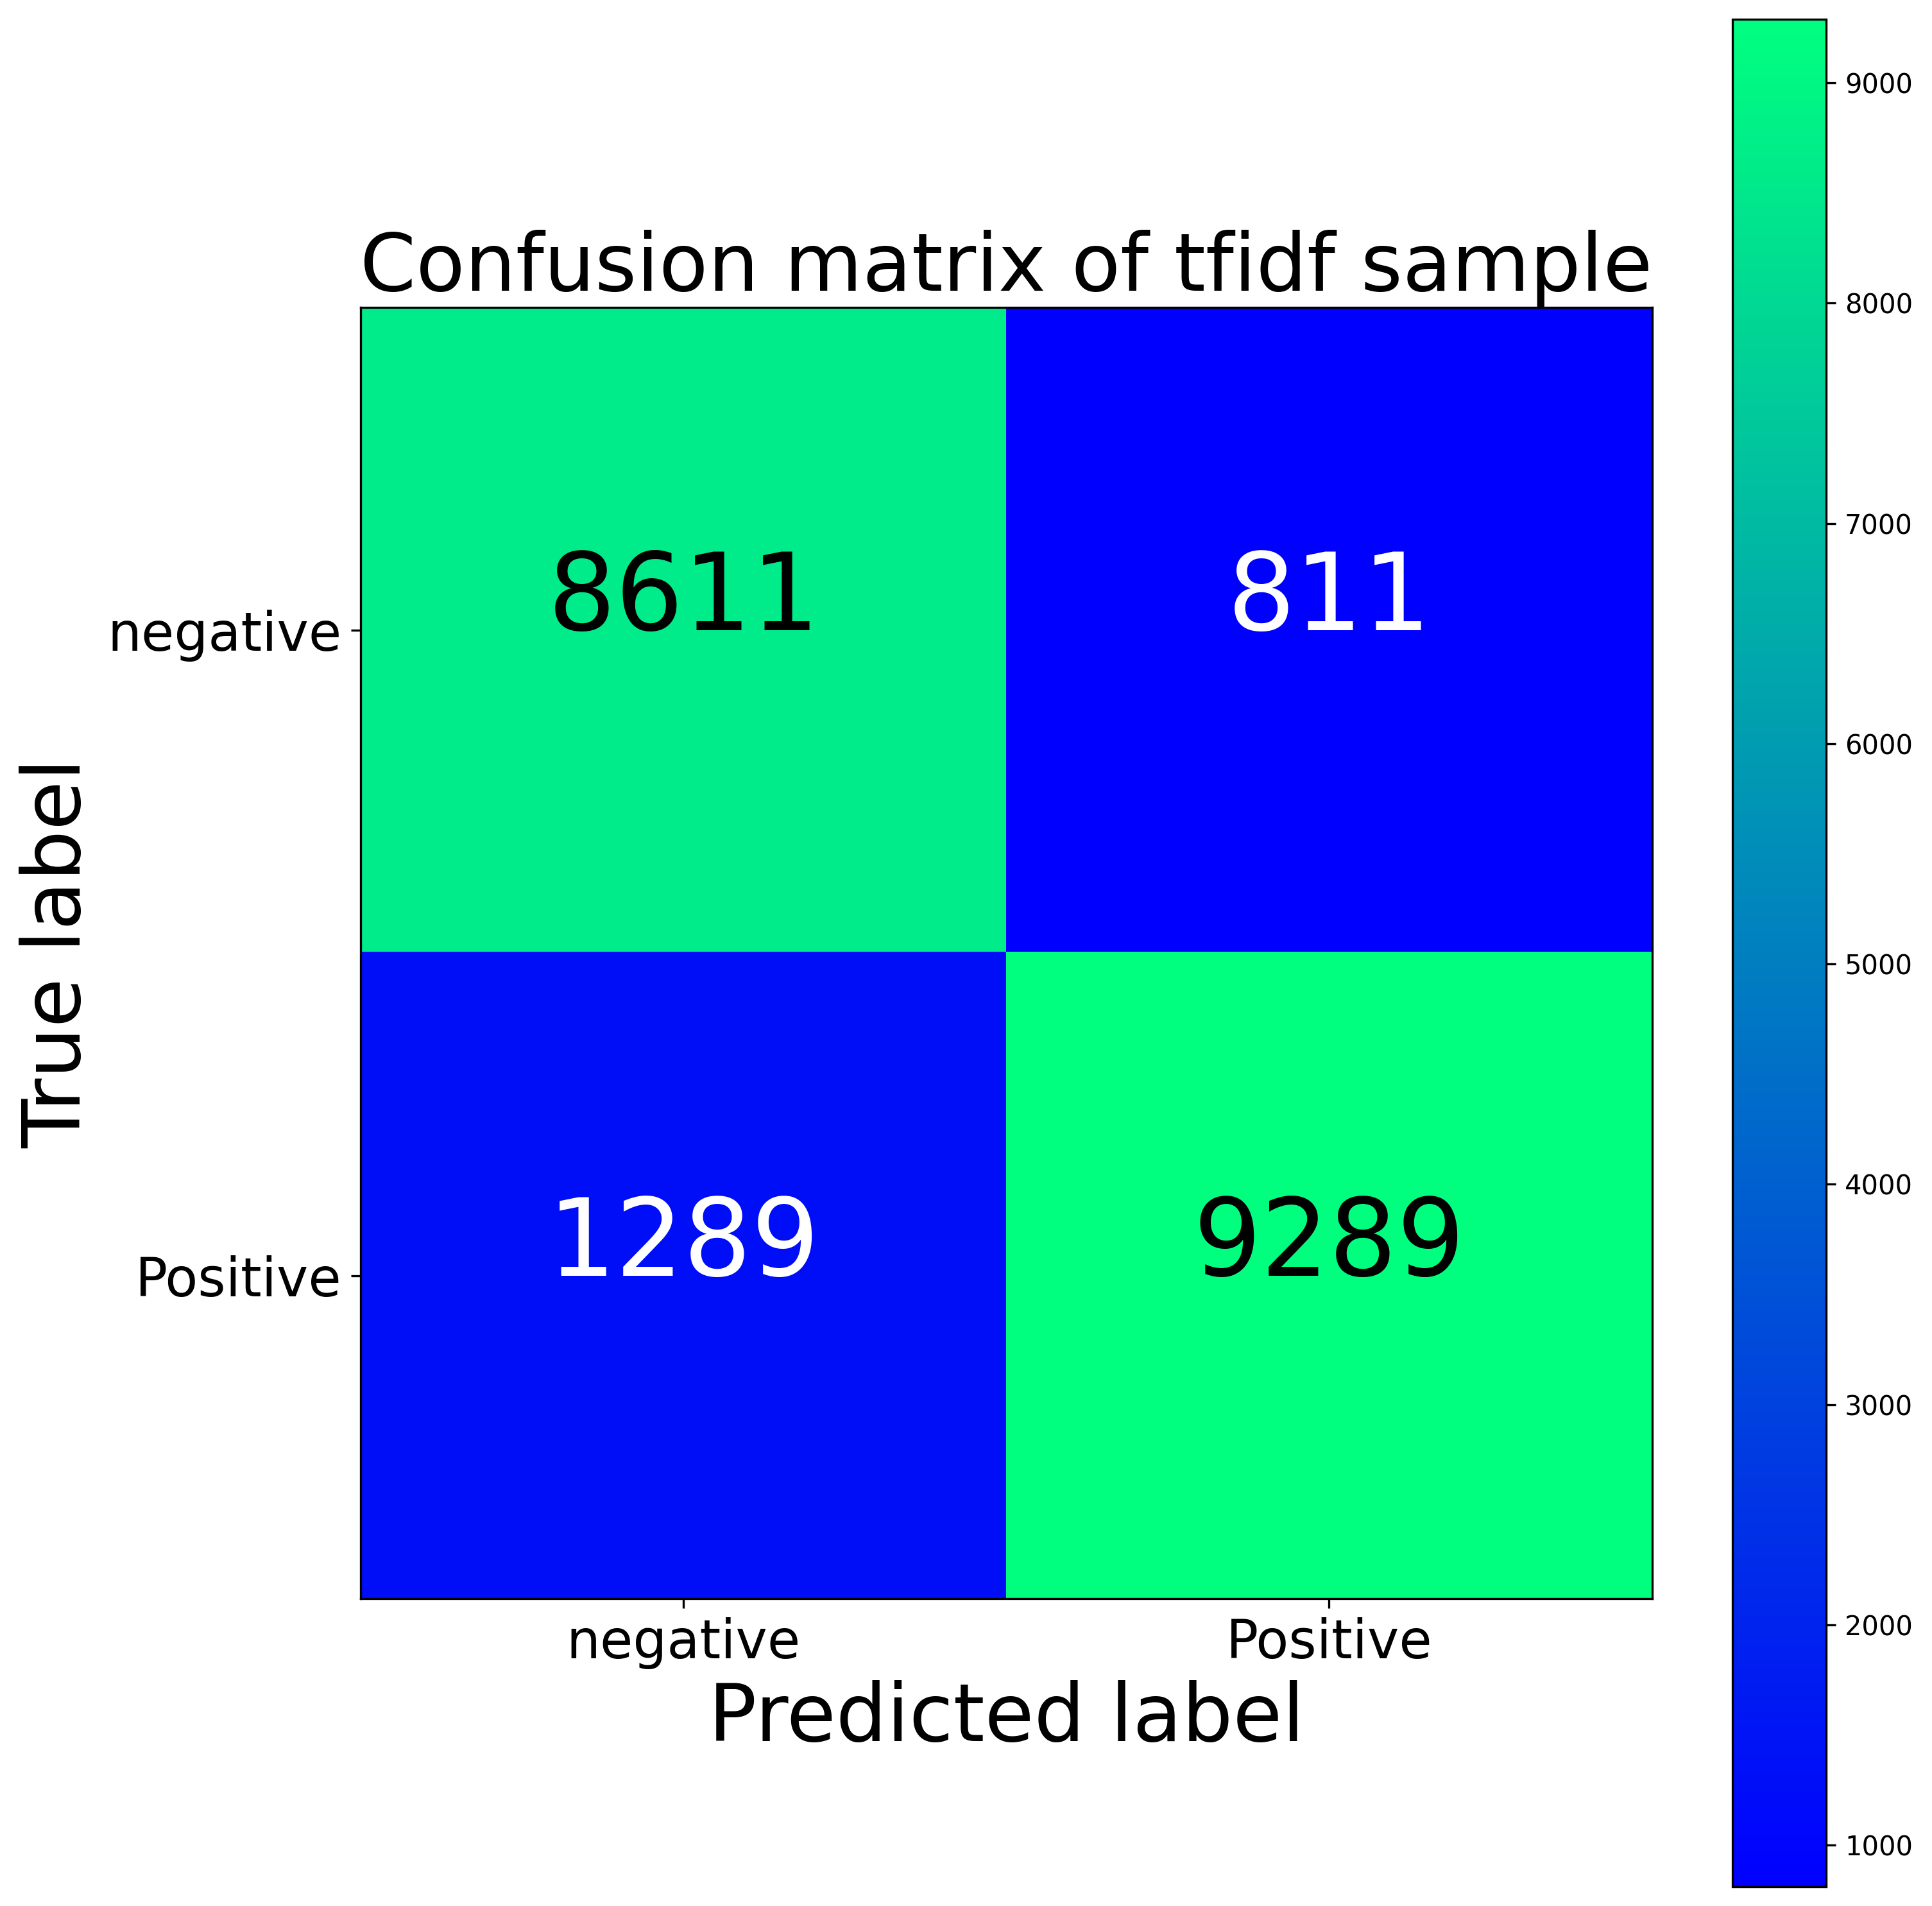

In [322]:
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm_lr_tfidf, classes=['negative','Positive'], 
                                 normalize=False, title='Confusion matrix of tfidf sample')


# Optimization of Logistic Regression Model 

In [371]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score
# transfer the y_test label to boolean list
y_test_bool = []
for item in y_test:
    if item == 'Positive':
        y_test_bool.append(1)
    else:
        y_test_bool.append(0)

# create dictionaries for evaluation 
accuracy_dict    = {}
recall_dict      = {}
precision_dict   = {}
roc_auc_dict     = {}

# it will change the thershold in range 5% - 95% here for logistic regress in order to optimize the result of the model.
for thershold in range(0,100,5):
    y_preds_tfidf = np.where(clf_lr_tfidf.predict_proba(X_test_tfidf)[:,1] > thershold/100, 1, 0)
    accuracy_dict[thershold]   = accuracy_score(y_test_bool,y_preds_tfidf)*100
    recall_dict[thershold]     = recall_score(y_test_bool,y_preds_tfidf)*100
    precision_dict[thershold]  = precision_score(y_test_bool,y_preds_tfidf)*100
    roc_auc_dict[thershold]    = roc_auc_score(y_test_bool,y_preds_tfidf)*100




Text(39, 86, 'Threshold:43%')

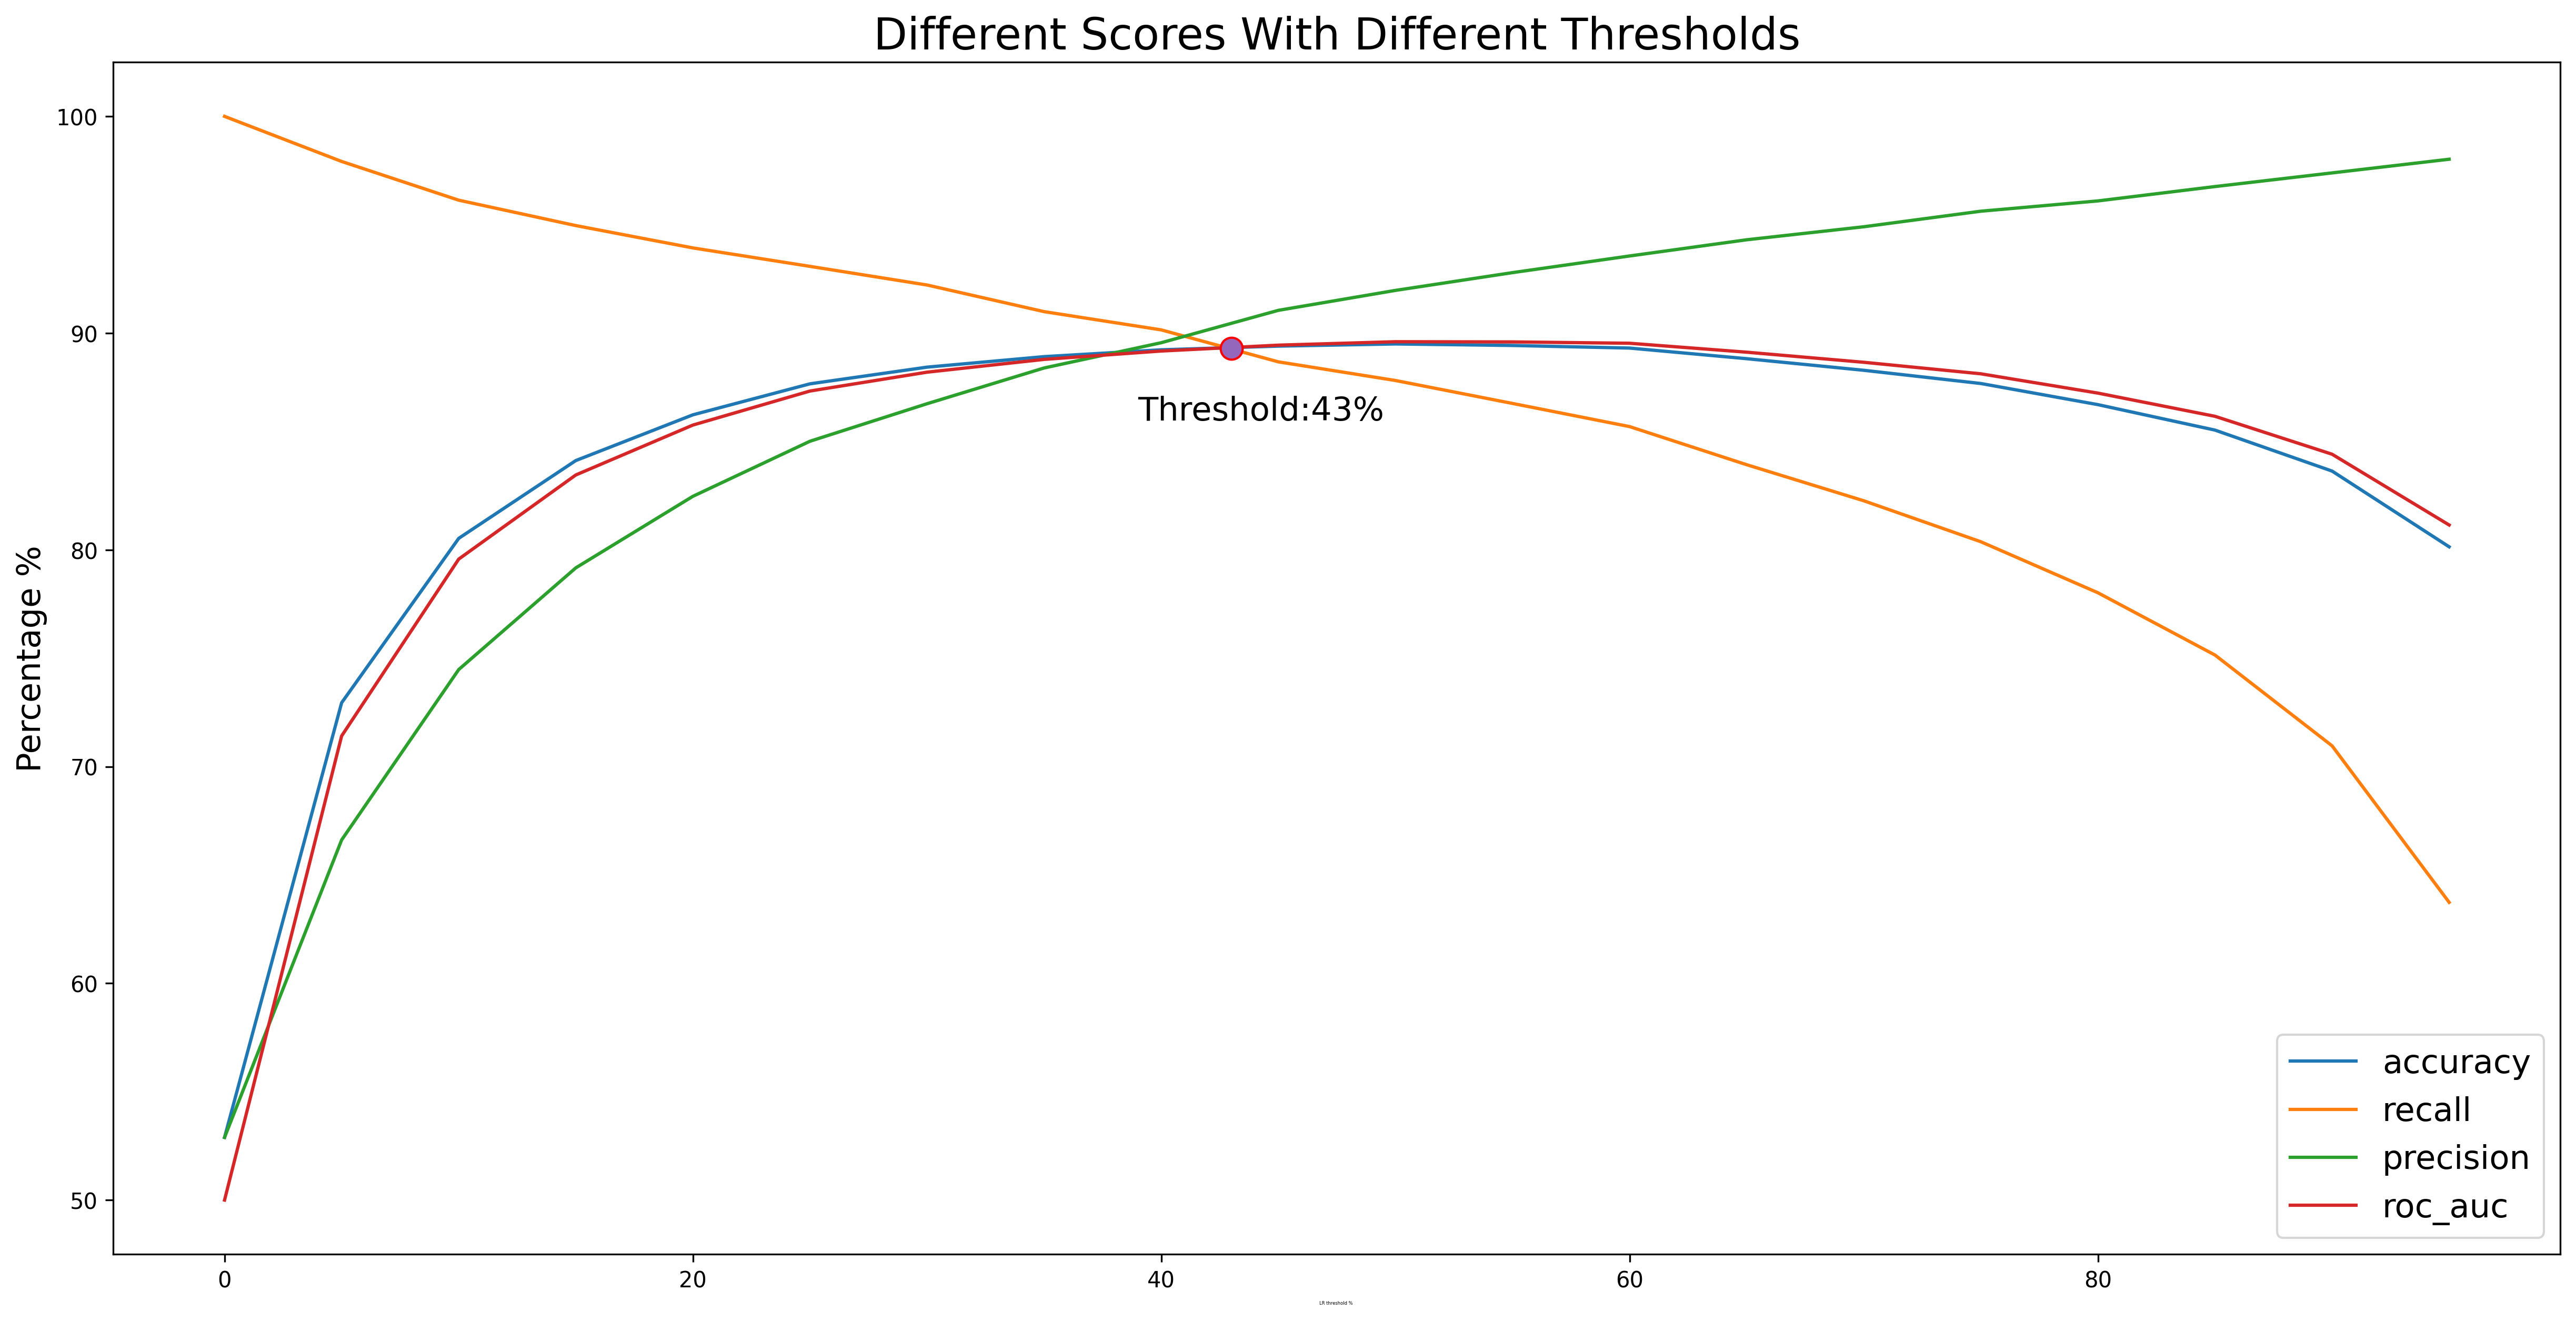

In [379]:
accuracy_plot  = accuracy_dict.items()
recall_plot    = recall_dict.items()
precision_plot = precision_dict.items()
roc_auc_plot   = roc_auc_dict.items()
x1, y1 = zip(*accuracy_plot) 
x2, y2 = zip(*recall_plot) 
x3, y3 = zip(*precision_plot) 
x4, y4 = zip(*roc_auc_plot)
# After observing the graph and different score, 43%-45% woluld be the best threshold range
x5, y5 = 43, 89.3
x6, y6 = 39, 86

plt.xlabel("LR threshold % ",fontsize=2)
plt.ylabel("Percentage %",fontsize=15)
plt.title("Different Scores With Different Thresholds",fontsize=20)
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x4, y4)
plt.legend(["accuracy","recall","precision","roc_auc"],fontsize=15)
plt.plot(x5, y5, marker="o", markersize=10, markeredgecolor="red")
plt.text(x6, y6,"Threshold:43%",fontsize=15)